#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns

import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## Cargamos datos

In [73]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("./data/train.csv")


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [75]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


# Preprocesado

In [76]:

# Eliminamos 'y' de la columna 'age'
train['age'] = train['age'].str.replace('y', '')




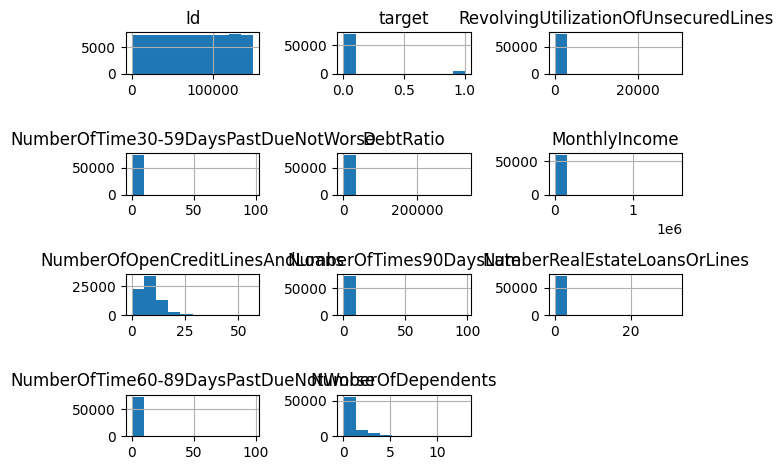

In [77]:
train.hist()
# Mostramos  histogramas de las variables
plt.tight_layout()
plt.show()

## Tratamiento de outliers

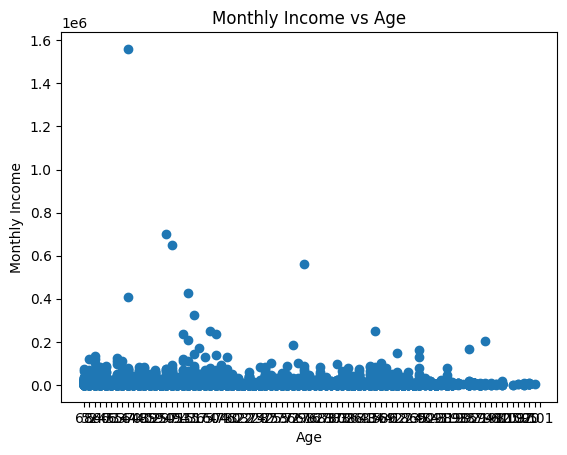

In [78]:
# Gráfico de dispersión para ver los posibles valores atípicos
plt.scatter(train['age'], train['MonthlyIncome'])

plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Monthly Income vs Age')
plt.show()

In [79]:
# Se Calcula los umbrales superiores utilizando la media y la desviación estándar
mean = np.mean(train['MonthlyIncome'])
std = np.std(train['MonthlyIncome'])

upper_threshold = mean + 5 * std


In [80]:
# Valores que están fuera de los umbrales
outliers = train[(train['MonthlyIncome'] > upper_threshold)]

# Eliminamos los outliers
train = train.drop(outliers.index)


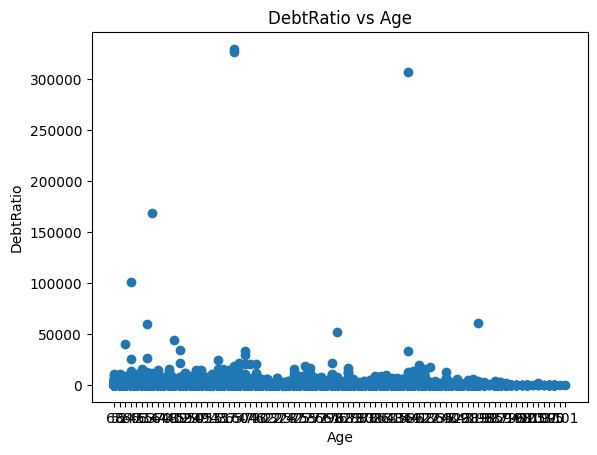

In [81]:
# Gráfico de dispersión para ver los posibles valores atípicos
plt.scatter(train['age'], train['DebtRatio'])

plt.xlabel('Age')
plt.ylabel('DebtRatio')
plt.title('DebtRatio vs Age')
plt.show()

In [82]:
# Se Calcula los umbrales superiores utilizando la media y la desviación estándar
mean = np.mean(train['DebtRatio'])
std = np.std(train['DebtRatio'])

upper_threshold = mean + 5 * std
print(upper_threshold)

12758.340019746522


In [83]:
# Sobrescribe 
outliers = train[(train['DebtRatio'] > upper_threshold)]
train = train.drop(outliers.index)

## Imputación de datos ausentes

In [84]:
missing_data = train.isnull().sum()
print(missing_data)

Id                                          0
target                                      0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           14522
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       1940
dtype: int64


In [85]:

# Creamos un imputador que utiliza la mediana
imputer = SimpleImputer(strategy='median')

# Imputar los valores faltantes en la columna 'MonthlyIncome'
train['MonthlyIncome'] = imputer.fit_transform(train[['MonthlyIncome']])

imputer = SimpleImputer(strategy='most_frequent') #igual pero con la moda
train['NumberOfDependents'] = imputer.fit_transform(train[['NumberOfDependents']])

# Convertimos a numérico
train['age'] = pd.to_numeric(train['age'])


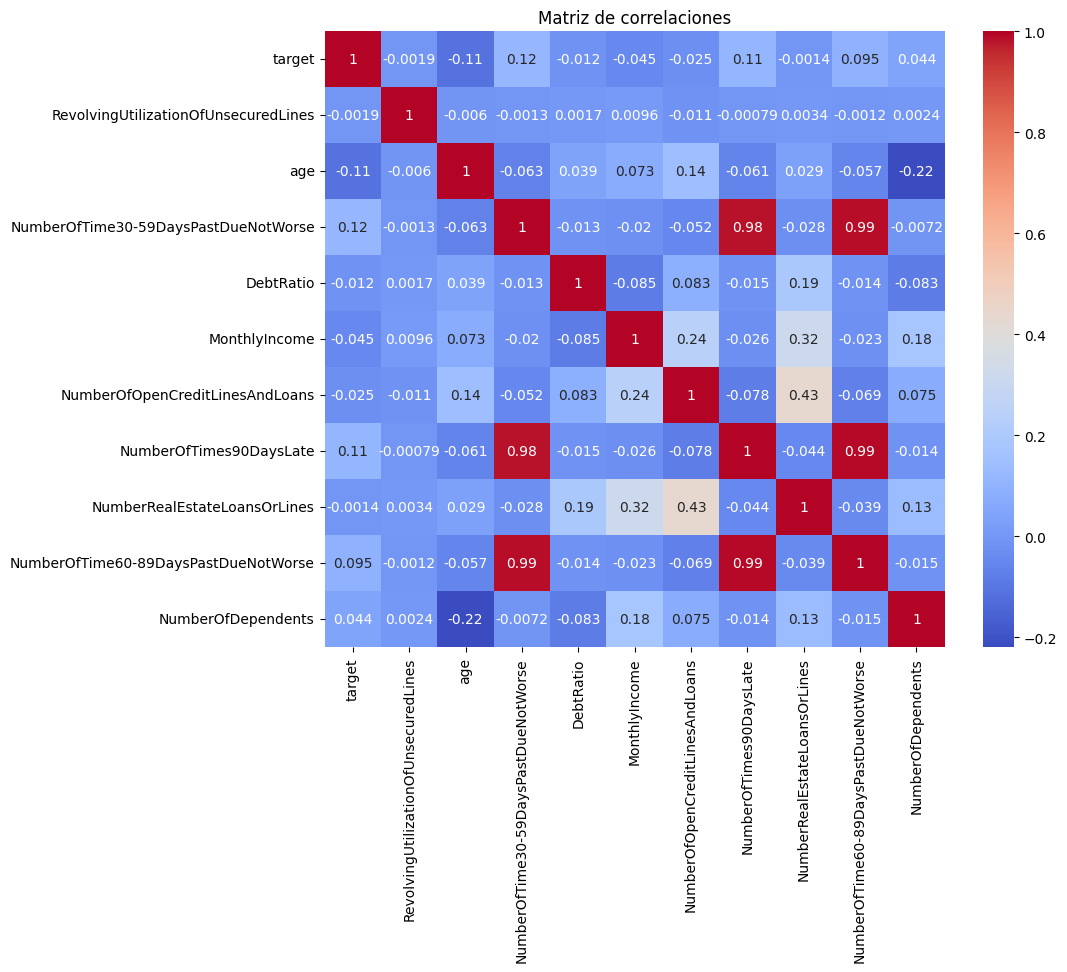

In [86]:

numeric_columns = train.drop(['Id'], axis=1)

# Matriz de correlaciones
correlation_matrix = numeric_columns.corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlaciones')
plt.show()


In [87]:
train['target'].value_counts()

0    68365
1     4828
Name: target, dtype: int64

# Entrenamiento de Modelos

In [88]:
train_X = train.drop(["target"], axis=1)
train_y = (train["target"])

In [89]:
train_X, test_x, train_y, test_y=train_test_split(train.drop('target',axis=1),train["target"],test_size=0.2,random_state=300)

# Imprimimos los tamaños de los conjuntos de entrenamiento y prueba
print("Tamaño de train_X:", train_X.shape)
print("Tamaño de test_X:", test_x.shape)
print("Tamaño de train_y:", train_y.shape)
print("Tamaño de test_y:", test_y.shape)

Tamaño de train_X: (58554, 11)
Tamaño de test_X: (14639, 11)
Tamaño de train_y: (58554,)
Tamaño de test_y: (14639,)


## Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=300).fit(train_X, train_y)
predictiontree = model.predict_proba(test_x)[:, 1]


In [91]:
roctree=roc_auc_score(test_y, predictiontree)
print('roc ',roctree)

roc  0.603783896850516


# GRID SEARCH

In [92]:

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

base_model = DecisionTreeClassifier(random_state=300)

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)

# Parámetros óptimos
opt_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Mejores parámetros:", opt_params)
print("Mejor score:", best_score)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mejor score: 0.936093175079507


In [93]:
model = DecisionTreeClassifier(random_state=300,criterion='entropy',max_depth=5,max_features='auto',min_samples_leaf=2,min_samples_split=2 ).fit(train_X, train_y)
predictiontree = model.predict_proba(test_x)[:, 1]

In [94]:
roctree=roc_auc_score(test_y, predictiontree)
print('roc ',roctree)

roc  0.8298458229814201


# Limpiamos el archivo de test

In [95]:
test = pd.read_csv("./data/test.csv")

In [96]:
test['age'] = test['age'].str.replace('y', '')



In [97]:

# imputador que utiliza la mediana
imputer = SimpleImputer(strategy='median')

# Se imputan los valores faltantes en la columna 'MonthlyIncome'
test['MonthlyIncome'] = imputer.fit_transform(test[['MonthlyIncome']])

imputer = SimpleImputer(strategy='most_frequent')
# Imputar los valores faltantes en la columna 'NumberOfDependents'
test['NumberOfDependents'] = imputer.fit_transform(test[['NumberOfDependents']])

test['age'] = pd.to_numeric(test['age'])

# Predecimos el archivo test

Entrenamos el modelo con todos los datos

In [98]:
X = train.drop(["target"], axis=1)
y = (train["target"])

In [99]:
model = DecisionTreeClassifier(random_state=300,criterion='entropy',max_depth=5,max_features='auto',min_samples_leaf=2,min_samples_split=2 ).fit(X, y)
predictiontree = model.predict_proba(test_x)[:, 1]

In [100]:
predictions_submit = model.predict_proba(test)[:, 1]

In [101]:
sample = pd.read_csv("data/sample_submission.csv")

In [102]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [103]:
sample.shape

(31442, 2)

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [104]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [105]:
submission.head()

,Id,target
0,15576,0.010757
1,94308,0.010757
2,53983,0.010757
3,61359,0.010757
4,71383,0.010757


In [106]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [107]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [108]:
chequeator(submission)

You're ready to submit!
